In [ ]:
import pandas as pd
import numpy as np
import os as os
#from google.colab import drive
import math
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import ast
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

working_directory = os.getcwd()
print(working_directory)

path = working_directory

C:\Users\saneem


In [ ]:
!pip3 install wes

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import wes
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##Import datasets

# The folloing line will work if you're running the program on your local machine
# fulldatapop = pd.read_csv(path +'/spotify_data/fulldata_with_popularity.csv')

# The following code will work if you're running the program on Google Colab
# Change the directory after "/content/drive/My Drive/", to where you have saved the csv file on your own drive
# Ask me if you have any questions about it on Discord
#drive.mount('/content/drive')
#fulldatapop = pd.read_csv('/content/drive/My Drive/GroupCA/fulldata_with_popularity.csv')
fulldatapop = pd.read_csv('fulldata_with_popularity.csv')

In [ ]:
fulldatapop.head(5)

,Unnamed: 0,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,popularity
0,0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,...,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02,68
1,1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,...,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02,74
2,2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,...,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02,59
3,3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,...,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02,54
4,4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,...,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02,71


In [ ]:
fulldatapop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1204025 non-null  int64  
 1   id                1204025 non-null  object 
 2   name              1204025 non-null  object 
 3   album             1204025 non-null  object 
 4   album_id          1204025 non-null  object 
 5   artists           1204025 non-null  object 
 6   artist_ids        1204025 non-null  object 
 7   track_number      1204025 non-null  int64  
 8   disc_number       1204025 non-null  int64  
 9   explicit          1204025 non-null  bool   
 10  danceability      1204025 non-null  float64
 11  energy            1204025 non-null  float64
 12  key               1204025 non-null  int64  
 13  loudness          1204025 non-null  float64
 14  mode              1204025 non-null  int64  
 15  speechiness       1204025 non-null  float64
 16  

### **Cleaning Data for Analysis**


***Select features we want to keep for analysis***

In [ ]:
fulldatapop = fulldatapop[["id","artists", "name", "year", "explicit",
                        "danceability", "energy", "loudness", "speechiness",
                        "instrumentalness","acousticness","liveness", "valence", "key", "mode",
                        "tempo", "time_signature", "duration_ms", "popularity"]]

In [ ]:
#Check for duplicates
fulldatapop.duplicated().sum()

0

In [ ]:
#Check for nulls
fulldatapop.isnull().sum().sum()

0

In [ ]:
#Remove 0 from year
fulldatapop.year.unique()

array([1999, 1992, 2018, 2003, 1994, 2002, 2011, 1998, 2000, 1996, 2001,
       1984, 1997, 1988, 1985, 1995, 2017, 1973, 2010, 2019, 2007, 2020,
       2015, 2016, 1991, 1979, 1993, 1962, 1989, 2004, 2009, 2014, 2005,
       1990, 2008, 2012, 1981, 1954, 2013, 1987, 1983, 1986, 2006, 1974,
       1965, 1982, 1970, 1971, 1968, 1949, 1966, 1980, 1957, 1956, 1958,
       1977, 1967, 1963, 1964, 1969, 1975, 1960, 1953, 1933, 1976, 1978,
       1928, 1929, 1959, 1961, 1972, 1955, 1952, 1945, 1926, 1930, 1951,
       1950, 1948, 1946, 1909, 1935, 1936, 1917, 1944, 1943, 1908, 1920,
       1932, 1947, 1925, 1923, 1931, 1900, 1927, 1924, 1937, 1939, 1942,
       1938,    0], dtype=int64)

In [ ]:
#save as csv
fulldatapop.to_csv('fulldatapop.csv')

***Exploratory Data Analysis***

In [ ]:
fulldatapop = fulldatapop[fulldatapop.year != 0]

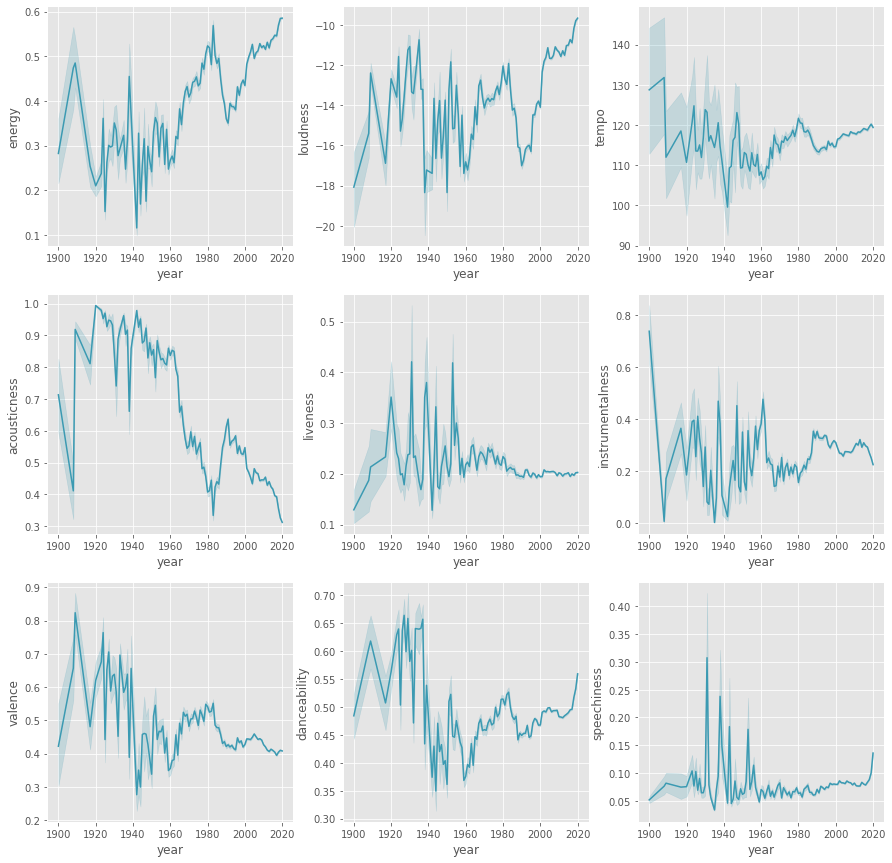

In [ ]:
wes.set_palette('Zissou1')
fig , axes = plt.subplots(3,3,figsize=(15,15))
sns.lineplot(fulldatapop['year'],fulldatapop['energy'],ax=axes[0,0])
sns.lineplot(fulldatapop['year'],fulldatapop['loudness'],ax=axes[0,1])
sns.lineplot(fulldatapop['year'],fulldatapop['tempo'],ax=axes[0,2])
sns.lineplot(fulldatapop['year'],fulldatapop['acousticness'],ax=axes[1,0])
sns.lineplot(fulldatapop['year'],fulldatapop['liveness'],ax=axes[1,1])
sns.lineplot(fulldatapop['year'],fulldatapop['instrumentalness'],ax=axes[1,2])
sns.lineplot(fulldatapop['year'],fulldatapop['valence'],ax=axes[2,0])
sns.lineplot(fulldatapop['year'],fulldatapop['danceability'],ax=axes[2,1])
sns.lineplot(fulldatapop['year'],fulldatapop['speechiness'],ax=axes[2,2])
plt.show()

In [ ]:
numericdata = fulldatapop[["explicit",
                        "danceability", "energy", "loudness", "speechiness",
                        "instrumentalness","acousticness","liveness", "valence", "popularity"]]
numericdata.corr(method= 'pearson')

,explicit,danceability,energy,loudness,speechiness,instrumentalness,acousticness,liveness,valence,popularity
explicit,1.000000,0.194321,0.162870,0.163154,0.336888,-0.161284,-0.182158,0.042839,0.056826,0.134054
danceability,0.194321,1.000000,0.283020,0.378204,0.209861,-0.285348,-0.285744,-0.044322,0.563437,0.141682
energy,0.162870,0.283020,1.000000,0.817934,0.130813,-0.252132,-0.796246,0.213494,0.399532,0.149326
loudness,0.163154,0.378204,0.817934,1.000000,0.062403,-0.393036,-0.671560,0.138122,0.385010,0.188222
speechiness,0.336888,0.209861,0.130813,0.062403,1.000000,-0.167552,-0.082375,0.189012,0.099679,0.028676
instrumentalness,-0.161284,-0.285348,-0.252132,-0.393036,-0.167552,1.000000,0.244141,-0.118984,-0.284718,-0.138247
acousticness,-0.182158,-0.285744,-0.796246,-0.671560,-0.082375,0.244141,1.000000,-0.115005,-0.268833,-0.159980
liveness,0.042839,-0.044322,0.213494,0.138122,0.189012,-0.118984,-0.115005,1.000000,0.062664,0.025399
valence,0.056826,0.563437,0.399532,0.385010,0.099679,-0.284718,-0.268833,0.062664,1.000000,0.059366
popularity,0.134054,0.141682,0.149326,0.188222,0.028676,-0.138247,-0.159980,0.025399,0.059366,1.000000


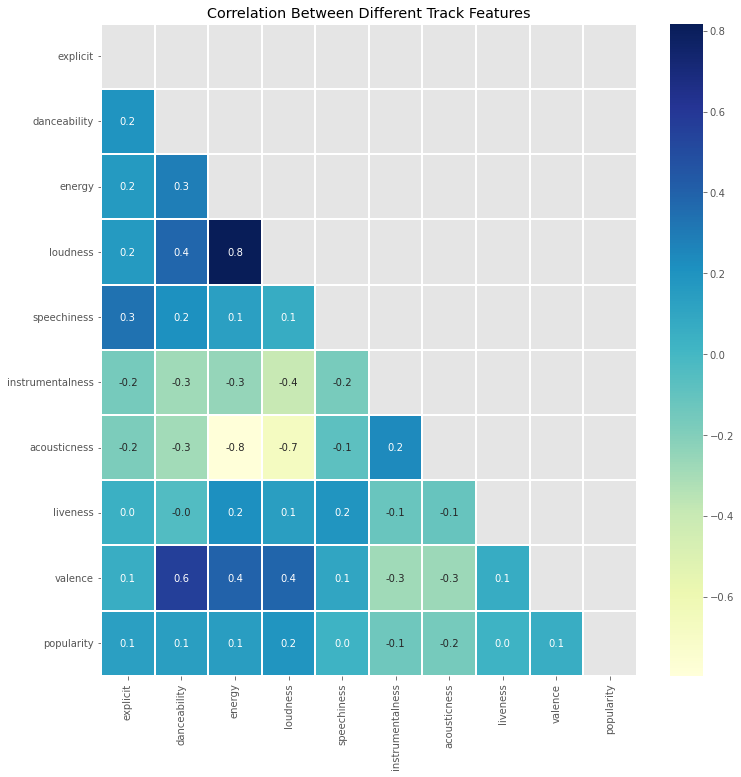

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(numericdata.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(numericdata.corr(method = 'pearson'), annot=True, linewidths=0.4,
            linecolor="white", cmap="YlGnBu", fmt= '.1f',
            ax=ax,mask=mask).set(title='Correlation Between Different Track Features')
plt.show()

In [ ]:
fulldatapop['artists'].nunique() #out of 1.2 million entries, only 165364 artists are unique.

165364

Text(0.5, 1.0, '20 Most Popular Artists')

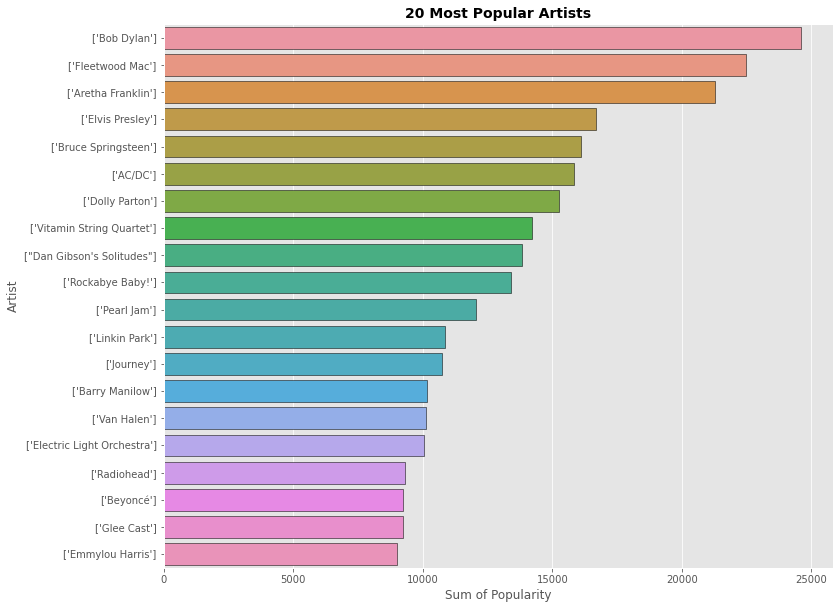

In [ ]:
#Plotting 20 most popular artists in dataset
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = fulldatapop.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', fontsize=12)
ax.set_ylabel('Artist', fontsize=12)
ax.set_title('20 Most Popular Artists', fontsize=14, weight = 'bold')

Text(0.5, 1.0, 'Most Popular Key')

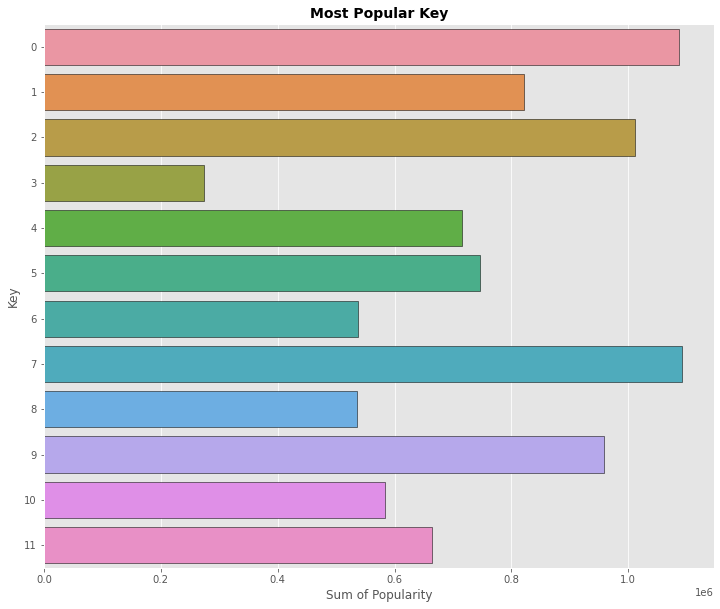

In [ ]:
#Plotting most popular Key in dataset
fig, ax = plt.subplots(figsize = (12, 10))
popular_key = fulldatapop.groupby('key')['popularity'].sum().sort_values(ascending=False)
ax = sns.barplot(x=popular_key.values, y=popular_key.index, orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', fontsize=12)
ax.set_ylabel('Key', fontsize=12)
ax.set_title('Most Popular Key', fontsize=14, weight = 'bold')

-----------------------------------------------------------------------------

#### Feature Engineering

In [ ]:
fulldatapop['decade'] = fulldatapop['year'].map(lambda year: math.floor(year/10)*10)

In [ ]:
fulldatapop['decade'].value_counts()

2010    498089
2000    423753
1990    153049
2020     69726
1980     28595
1970     17183
1960      8784
1950      3159
1940       653
1920       461
1930       453
1900        58
1910        52
Name: decade, dtype: int64

In [ ]:
fulldatapop['num_of_artists'] = fulldatapop['artists'].map(lambda artist: len(ast.literal_eval(artist)))

In [ ]:
fulldatapop['num_of_artists'].value_counts()

1     922576
2     145009
3      75776
4      31018
5      10111
6       5011
7       3052
8       2972
9       1766
10      1328
11      1064
12       996
13       628
14       512
16       464
15       432
17       412
20       194
19       185
22       106
18       101
21        60
23        52
24        47
31        42
26        36
27        31
30        11
28         9
42         2
43         2
47         1
45         1
46         1
40         1
41         1
48         1
25         1
29         1
44         1
51         1
Name: num_of_artists, dtype: int64

In [ ]:
fulldatapop['main_artist'] = fulldatapop['artists'].map(lambda artist: ast.literal_eval(artist)[0])

In [ ]:
fulldatapop.head()

,id,artists,name,year,explicit,danceability,energy,loudness,speechiness,instrumentalness,...,valence,key,mode,tempo,time_signature,duration_ms,popularity,decade,num_of_artists,main_artist
0,7lmeHLHBe4nmXzuXc0HDjk,['Rage Against The Machine'],Testify,1999,False,0.470,0.978,-5.399,0.0727,0.000011,...,0.503,7,1,117.906,4.0,210133,68,1990,1,Rage Against The Machine
1,1wsRitfRRtWyEapl0q22o8,['Rage Against The Machine'],Guerrilla Radio,1999,True,0.599,0.957,-5.764,0.1880,0.000071,...,0.489,11,1,103.680,4.0,206200,74,1990,1,Rage Against The Machine
2,1hR0fIFK2qRG3f3RF70pb7,['Rage Against The Machine'],Calm Like a Bomb,1999,False,0.315,0.970,-5.424,0.4830,0.000002,...,0.370,7,1,149.749,4.0,298893,59,1990,1,Rage Against The Machine
3,2lbASgTSoDO7MTuLAXlTW0,['Rage Against The Machine'],Mic Check,1999,True,0.440,0.967,-5.830,0.2370,0.000004,...,0.574,11,0,96.752,4.0,213640,54,1990,1,Rage Against The Machine
4,1MQTmpYOZ6fcMQc56Hdo7T,['Rage Against The Machine'],Sleep Now In the Fire,1999,False,0.426,0.929,-6.729,0.0701,0.105000,...,0.539,2,1,127.059,4.0,205600,71,1990,1,Rage Against The Machine


In [ ]:
for x in fulldatapop.columns:
  print(x)

id
artists
name
year
explicit
danceability
energy
loudness
speechiness
instrumentalness
acousticness
liveness
valence
key
mode
tempo
time_signature
duration_ms
popularity
decade
num_of_artists
main_artist


In [ ]:
fulldatapop['popularity'] = pd.cut(fulldatapop.popularity, bins = 5, labels = ["Very Low", "Low", "Medium", "High", "Very High"], right = True)
fulldatapop.popularity.value_counts()

Very Low     1024716
Low           127673
Medium         42066
High            8686
Very High        874
Name: popularity, dtype: int64

### **Data Sampling**

In [ ]:
fulldatapop_copy = fulldatapop.copy()
fulldatapop_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204015 entries, 0 to 1204024
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   id                1204015 non-null  object  
 1   artists           1204015 non-null  object  
 2   name              1204015 non-null  object  
 3   year              1204015 non-null  int64   
 4   explicit          1204015 non-null  bool    
 5   danceability      1204015 non-null  float64 
 6   energy            1204015 non-null  float64 
 7   loudness          1204015 non-null  float64 
 8   speechiness       1204015 non-null  float64 
 9   instrumentalness  1204015 non-null  float64 
 10  acousticness      1204015 non-null  float64 
 11  liveness          1204015 non-null  float64 
 12  valence           1204015 non-null  float64 
 13  key               1204015 non-null  int64   
 14  mode              1204015 non-null  int64   
 15  tempo             1204015 non-nu

In [ ]:
fulldatapop_copy = fulldatapop_copy.drop(columns=['artists', 'name', 'id', 'main_artist', 'num_of_artists'])

In [ ]:
fulldatapop_copy['weights'] = fulldatapop_copy['popularity'].map({'Very Low': 0.2, 'Low': 0.2, 'Medium': 0.2, 'High': 0.2, 'Very High' : 0.2})
fulldatapop_copy = fulldatapop_copy.sample(n = 10000, weights='weights')
fulldatapop_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 896773 to 1009387
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   year              10000 non-null  int64   
 1   explicit          10000 non-null  bool    
 2   danceability      10000 non-null  float64 
 3   energy            10000 non-null  float64 
 4   loudness          10000 non-null  float64 
 5   speechiness       10000 non-null  float64 
 6   instrumentalness  10000 non-null  float64 
 7   acousticness      10000 non-null  float64 
 8   liveness          10000 non-null  float64 
 9   valence           10000 non-null  float64 
 10  key               10000 non-null  int64   
 11  mode              10000 non-null  int64   
 12  tempo             10000 non-null  float64 
 13  time_signature    10000 non-null  float64 
 14  duration_ms       10000 non-null  int64   
 15  popularity        10000 non-null  category
 16  decade         

In [ ]:
fulldatapop_copy = fulldatapop_copy.drop(columns=['weights'])
fulldatapop_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 896773 to 1009387
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   year              10000 non-null  int64   
 1   explicit          10000 non-null  bool    
 2   danceability      10000 non-null  float64 
 3   energy            10000 non-null  float64 
 4   loudness          10000 non-null  float64 
 5   speechiness       10000 non-null  float64 
 6   instrumentalness  10000 non-null  float64 
 7   acousticness      10000 non-null  float64 
 8   liveness          10000 non-null  float64 
 9   valence           10000 non-null  float64 
 10  key               10000 non-null  int64   
 11  mode              10000 non-null  int64   
 12  tempo             10000 non-null  float64 
 13  time_signature    10000 non-null  float64 
 14  duration_ms       10000 non-null  int64   
 15  popularity        10000 non-null  category
 16  decade         

### **Test and Train Split**

In [ ]:
#  Train and Test Split on Sample Data
target = "popularity"
y = fulldatapop_copy[target]
X = fulldatapop_copy[[col for col in fulldatapop_copy.columns if col != target]]
y.value_counts()

Very Low     8486
Low          1063
Medium        353
High           90
Very High       8
Name: popularity, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 16)
(2500, 16)
(7500,)
(2500,)


In [ ]:
# Use RandomOverSampler because the dataset for popularity is skewed highly towards the Very Low & Low sets of data.
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
y_train_ros.value_counts()

Very Low     6339
Low          6339
Medium       6339
High         6339
Very High    6339
Name: popularity, dtype: int64

### **Pipeline**

In [ ]:
categorical_features = ['decade', 'explicit', 'key', 'mode', 'time_signature']

numerical_features = ["danceability", "energy", "loudness", "speechiness",
                        "instrumentalness", "acousticness", "liveness", "valence", "tempo", "duration_ms"]

In [ ]:
pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore"))])
pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1)))])


In [ ]:
pipeline_full = ColumnTransformer([
                                   ("categorical", pipeline_categorical, categorical_features),
                                   ("numerical", pipeline_numerical, numerical_features)],remainder='passthrough')

In [ ]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train_ros)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (31695, 43)
X_test_transformed.shape: (2500, 43)


### Feature Reduction

In [ ]:
#from sklearn.manifold import TSNE
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
#X_train_transformed_TSNE = tsne.fit(X_train_transformed)
#X_test_transformed_TSNE = tsne.fit(X_test_transformed)

### **Model Selection based on Sample Data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
clf1 = RandomForestClassifier(random_state = 42)
clf2 = SVC(probability = True, random_state = 42)
clf3 = LogisticRegression(random_state = 42)
clf4 = DecisionTreeClassifier(random_state = 42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state = 42)
clf8 = ExtraTreesClassifier(random_state = 42)
clf9 = AdaBoostClassifier()

In [ ]:
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['11', '12']
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5, 10, 25, None]
param4['classifier__min_samples_split'] = [2, 5, 10]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2, 5, 10, 25, 50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

param8 = {}
param8['classifier__n_estimators'] = [10, 50, 100, 250]
param8['classifier__max_depth'] = [5, 10, 20]
param8['classifier'] = [clf8]

param9 = {}
param9['classifier__n_estimators'] = [10, 50, 100, 250]
param9['classifier__learning_rate'] = [0.5, 1.0]
param9['classifier'] = [clf9]

In [ ]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7, param8, param9]

In [ ]:
gs = RandomizedSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring = 'accuracy', random_state=42).fit(X_train_transformed, y_train_ros)

In [ ]:
gs.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_depth': 20,
 'classifier': RandomForestClassifier(max_depth=20, random_state=42)}

In [ ]:
score_df = pd.DataFrame(gs.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__min_samples_split,param_classifier__max_depth,param_classifier,param_classifier__n_estimators,param_classifier__penalty,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.204047,1.633361e-03,0.011670,4.715392e-04,2,10,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'classifier__min_samples_split': 2, 'classifi...",0.805868,0.809181,0.805017,0.806689,0.001796,4
1,0.195378,6.799930e-03,0.020338,4.721011e-04,NaN,5,"RandomForestClassifier(max_depth=20, random_st...",10,NaN,NaN,"{'classifier__n_estimators': 10, 'classifier__...",0.656886,0.653005,0.647231,0.652374,0.003967,6
2,0.010002,3.371748e-07,0.000000,0.000000e+00,NaN,NaN,LogisticRegression(random_state=42),NaN,12,1,"{'classifier__penalty': '12', 'classifier__C':...",NaN,NaN,NaN,NaN,NaN,9
3,0.203712,9.104209e-03,0.011670,4.727191e-04,5,10,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'classifier__min_samples_split': 5, 'classifi...",0.804827,0.808708,0.805490,0.806342,0.001695,5
4,0.010669,9.427969e-04,0.000000,0.000000e+00,NaN,NaN,LogisticRegression(random_state=42),NaN,12,0.01,"{'classifier__penalty': '12', 'classifier__C':...",NaN,NaN,NaN,NaN,NaN,10
5,0.136697,3.091822e-03,0.011003,8.104673e-07,5,5,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'classifier__min_samples_split': 5, 'classifi...",0.592333,0.587790,0.591387,0.590503,0.001957,7
6,2.133812,9.214500e-02,0.128696,3.682168e-03,NaN,20,"RandomForestClassifier(max_depth=20, random_st...",100,NaN,NaN,"{'classifier__n_estimators': 100, 'classifier_...",0.997255,0.997634,0.997444,0.997444,0.000155,1
7,3.828858,4.679402e-02,0.320405,8.015600e-03,NaN,20,ExtraTreesClassifier(random_state=42),250,NaN,NaN,"{'classifier__n_estimators': 250, 'classifier_...",0.995741,0.996876,0.996403,0.996340,0.000466,2
8,0.233717,1.885970e-02,0.020005,1.633946e-03,NaN,10,"RandomForestClassifier(max_depth=20, random_st...",10,NaN,NaN,"{'classifier__n_estimators': 10, 'classifier__...",0.919356,0.916706,0.919546,0.918536,0.001296,3
9,183.853738,7.542274e-01,15.729804,1.549141e-01,NaN,NaN,"SVC(probability=True, random_state=42)",NaN,NaN,0.01,"{'classifier__C': 0.01, 'classifier': SVC(prob...",0.207572,0.207761,0.208897,0.208077,0.000585,8


              precision    recall  f1-score   support

        High       0.00      0.00      0.00        28
         Low       0.40      0.01      0.02       244
      Medium       0.00      0.00      0.00        79
   Very High       0.00      0.00      0.00         2
    Very Low       0.86      1.00      0.92      2147

    accuracy                           0.86      2500
   macro avg       0.25      0.20      0.19      2500
weighted avg       0.78      0.86      0.80      2500



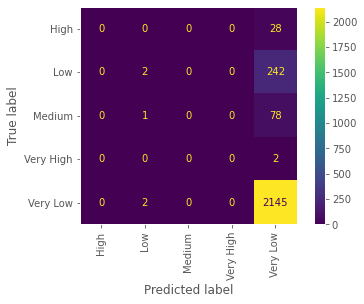

0.8588


In [ ]:
model = RandomForestClassifier(max_depth=20, random_state=42)
model.fit(X_train_transformed, y_train_ros)
y_pred = model.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

ax = plot_confusion_matrix(model, X_test_transformed, y_test, values_format ='d', xticks_rotation = 'vertical')
plt.grid(None)
plt.show()

score = accuracy_score(y_test, y_pred)
print(score)

In [ ]:
importance = model.feature_importances_

# feature names derived from the encoded columns and their individual importances
# encoded cols
enc_col_out = pipeline_full.named_transformers_['categorical'].get_feature_names_out()
enc_col_out_imp = importance[pipeline_full.output_indices_['categorical']]

# normalized cols
norm_col = pipeline_full.named_transformers_['numerical'].feature_names_in_
norm_col_imp = importance[pipeline_full.output_indices_['numerical']]

# remainder cols, require a quick lookup as no transformer object exists for this case
rem_cols = []
for (tname, _, cs) in pipeline_full.transformers_:
    if tname == 'remainder': rem_cols = X.columns[cs]; break
rem_col_imp = importance[pipeline_full.output_indices_['remainder']]


# storing them in a df for easy manipulation
imp_df = pd.DataFrame({'feature': (list(enc_col_out) + list(norm_col) + list(rem_cols)), 'importance': (list(enc_col_out_imp) + list(norm_col_imp) + list(rem_col_imp))})

# aggregating, assuming that column names don't contain _ just to keep it simple
imp_df['feature'] = imp_df['feature'].apply(lambda x: x.split('_')[0])
imp_agg = imp_df.groupby(by=['feature']).sum()
imp_agg =imp_agg.sort_values('importance')
print(imp_agg)
print(f'Sum of feature importances: {imp_df["importance"].sum()}')

                  importance
feature                     
time                0.013288
explicit            0.014153
mode                0.018800
decade              0.033306
instrumentalness    0.061156
speechiness         0.066100
acousticness        0.071656
duration            0.071774
valence             0.072504
tempo               0.074378
year                0.075252
energy              0.078847
loudness            0.082158
key                 0.084026
liveness            0.084699
danceability        0.097903
Sum of feature importances: 1.0


In [ ]:
# Now that we have ideintified the model, run the model against the entire dataset and confirm the results.

fulldatapop_finalcopy = fulldatapop.copy()
fulldatapop_finalcopy = fulldatapop_finalcopy.drop(columns=['artists', 'name', 'id', 'main_artist', 'num_of_artists'])

target = "popularity"
y = fulldatapop_finalcopy[target]
X = fulldatapop_finalcopy[[col for col in fulldatapop_copy.columns if col != target]]
y.value_counts()

Very Low     1024716
Low           127673
Medium         42066
High            8686
Very High        874
Name: popularity, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(903011, 16)
(301004, 16)
(903011,)
(301004,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
y_train_ros.value_counts()

Very Low     768534
Low          768534
Medium       768534
High         768534
Very High    768534
Name: popularity, dtype: int64

In [ ]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train_ros)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (3842670, 45)
X_test_transformed.shape: (301004, 45)


              precision    recall  f1-score   support

        High       0.07      0.14      0.09      2149
         Low       0.22      0.24      0.23     31904
      Medium       0.13      0.22      0.16     10547
   Very High       0.02      0.08      0.03       222
    Very Low       0.90      0.85      0.87    256182

    accuracy                           0.76    301004
   macro avg       0.27      0.30      0.28    301004
weighted avg       0.79      0.76      0.77    301004



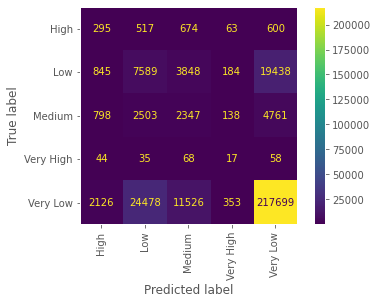

Accuracy Score for the final model is : 0.757


In [ ]:
model = RandomForestClassifier(max_depth=20, random_state=42)
model.fit(X_train_transformed, y_train_ros)
y_pred = model.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

ax = plot_confusion_matrix(model, X_test_transformed, y_test, values_format ='d', xticks_rotation = 'vertical')
plt.grid(None)
plt.show()

score = accuracy_score(y_test, y_pred)
print("Accuracy Score for the final model is : %.3f" %score)